# MODULO 04 - Análise e Previsão de Séries Temporais

## IMPORTAÇÃO LIBS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from datetime import datetime 

## IMPORTAÇÃO DO DATASET

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv",
                   sep = ";", skiprows=3, skipfooter=16, engine="python", encoding='ISO-8859-1')

dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151,85031
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094,84600
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574,86768
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723,86318
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176,85381


In [3]:
# removendo 'coluna Total'
dados.drop('Total', axis=1, inplace=True)
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [4]:
# removendo index 19
dados.drop(19, inplace=True)
dados 

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [5]:
# Função 'melt'
dados_set = dados.melt(id_vars='Ano Diagnóstico', value_name='Casos', var_name='Mês')
dados_set

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [6]:
# criando coluna com 'mes+ano'
dados_set['data'] = dados_set['Ano Diagnóstico'] + "-" + dados_set['Mês']
dados_set

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [7]:
# Criando um dataframe "traduzindo" os meses

meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

# função map para traduzir
dados_set['Mês'] = dados_set['Mês'].map(meses_port_ing)

In [8]:
# criando coluna com 'mes+ano'
dados_set['data'] = dados_set['Ano Diagnóstico'] + "-" + dados_set['Mês']
dados_set

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [9]:
dados_set.sample(10)

,Ano Diagnóstico,Mês,Casos,data
118,2005,Jul,7282,2005-Jul
126,2013,Jul,7379,2013-Jul
11,2012,Jan,7375,2012-Jan
73,2017,Apr,6780,2017-Apr
102,2008,Jun,6929,2008-Jun
47,2010,Mar,8308,2010-Mar
223,2015,Dec,6844,2015-Dec
226,2018,Dec,6900,2018-Dec
31,2013,Feb,6209,2013-Feb
82,2007,May,7368,2007-May


In [10]:
# alterando o tipo de dado
dados_set['Data'] = pd.to_datetime(dados_set['data'])
dados_set

,Ano Diagnóstico,Mês,Casos,data,Data
0,2001,Jan,8088,2001-Jan,2001-01-01
1,2002,Jan,8013,2002-Jan,2002-01-01
2,2003,Jan,8115,2003-Jan,2003-01-01
3,2004,Jan,7574,2004-Jan,2004-01-01
4,2005,Jan,7432,2005-Jan,2005-01-01
...,...,...,...,...,...
223,2015,Dec,6844,2015-Dec,2015-12-01
224,2016,Dec,6672,2016-Dec,2016-12-01
225,2017,Dec,7020,2017-Dec,2017-12-01
226,2018,Dec,6900,2018-Dec,2018-12-01


In [11]:
dados_set = dados_set[['Data', 'Casos']]
dados_set.sample(3)

,Data,Casos
220,2012-12-01,6302
114,2001-07-01,6987
180,2010-10-01,7210


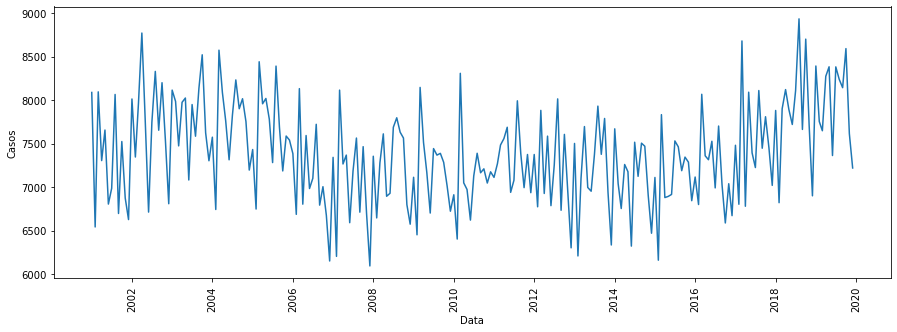

In [12]:
# Plotando
plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_set)
plt.xticks(rotation = 90)
plt.show()

In [13]:
# ordenando o dataframe pela data
dados_set.sort_values(by='Data', inplace = True)
dados_set.reset_index(drop=True, inplace=True)

dados_set

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


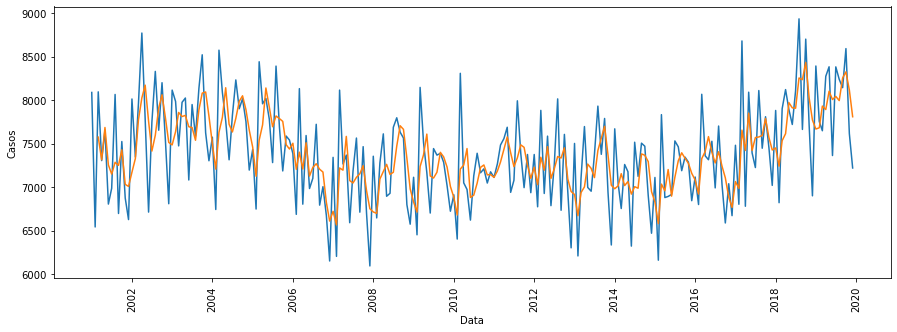

In [14]:
# Calculando a média móvel
dados_set['Media_movel_3'] = dados_set['Casos'].rolling(3).mean()

plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_set)
sns.lineplot(x="Data", y="Media_movel_3", data=dados_set)

plt.xticks(rotation = 90)
plt.show()

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


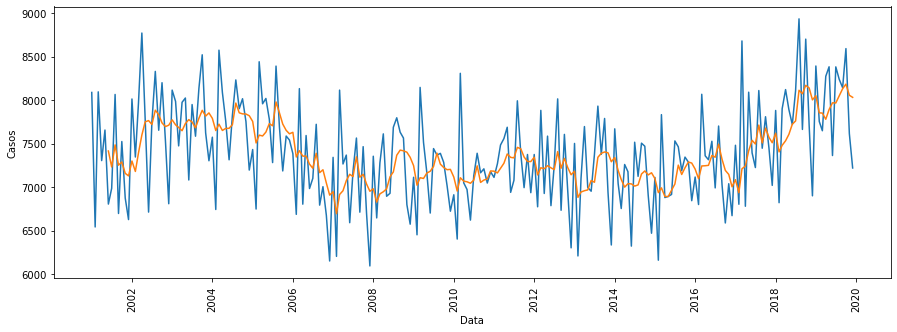

In [15]:
plt.figure(figsize=(15,5))

# Calculando a média móvel
dados_set['Media_movel_6'] = dados_set['Casos'].rolling(6).mean()

sns.lineplot(x="Data", y="Casos", data=dados_set)
sns.lineplot(x="Data", y="Media_movel_6", data=dados_set)

plt.xticks(rotation = 90)
plt.show()

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


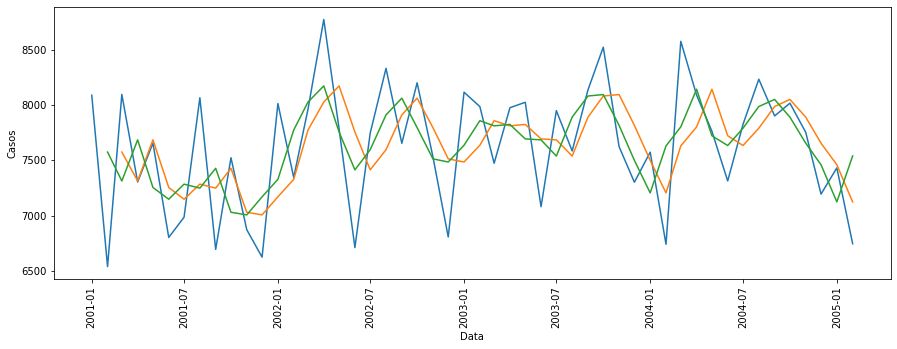

In [16]:
plt.figure(figsize=(15,5))

# Calculando a média móvel
dados_set['Media_movel_6'] = dados_set['Casos'].rolling(3).mean()

dados_set['Media_movel_3c'] = dados_set['Casos'].rolling(3, center = True).mean()

sns.lineplot(x="Data", y="Casos", data=dados_set[:50])
sns.lineplot(x="Data", y="Media_movel_3", data=dados_set[:50])
sns.lineplot(x='Data', y='Media_movel_3c', data = dados_set[:50])

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Data', ylabel='Casos'>

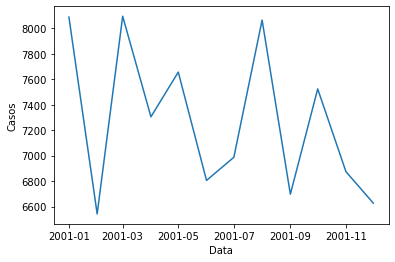

In [17]:
sns.lineplot(x='Data', y='Casos', data=dados_set[:12])

<AxesSubplot:xlabel='Data', ylabel='Casos'>

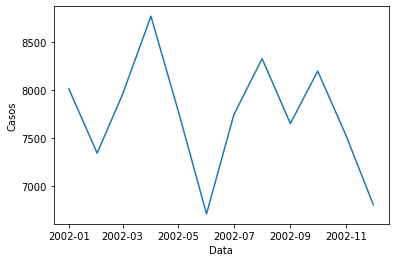

In [18]:
sns.lineplot(x='Data', y='Casos', data=dados_set[12:24])

In [19]:
dados_set['Ano'] = dados_set['Data'].dt.year
dados_set['Mes'] = dados_set['Data'].dt.month

<AxesSubplot:xlabel='Mes', ylabel='Casos'>

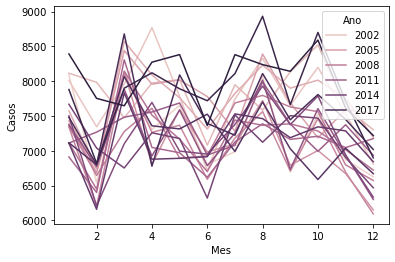

In [20]:
sns.lineplot(data=dados_set, x='Mes', y='Casos', hue='Ano')

<AxesSubplot:xlabel='Mes', ylabel='Casos'>

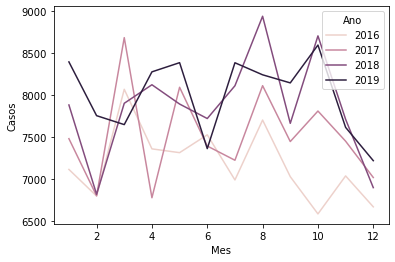

In [21]:
sns.lineplot(data=dados_set.query('Ano in [2019, 2018, 2017, 2016]'), x='Mes', y='Casos', hue='Ano')

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# As datas precisam ser indices
decomposicao = seasonal_decompose(dados_set[['Data', 'Casos']].set_index('Data'))

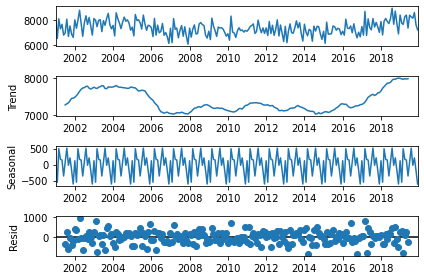

In [24]:
decomposicao.plot();

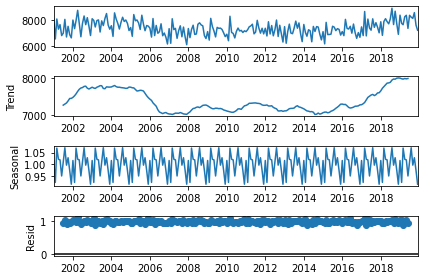

In [25]:
# As datas precisam ser indices
# Aditivos x multiplicativos
decomposicao = seasonal_decompose(dados_set[['Data', 'Casos']].set_index('Data'), model='multiplicative')
decomposicao.plot();

In [26]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [27]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])

<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

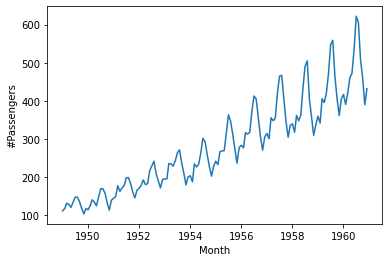

In [31]:
sns.lineplot(x='Month', y='#Passengers', data=dados_passageiros)

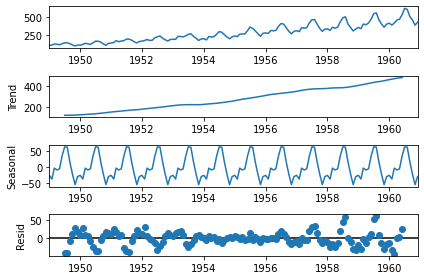

In [33]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_p.plot();

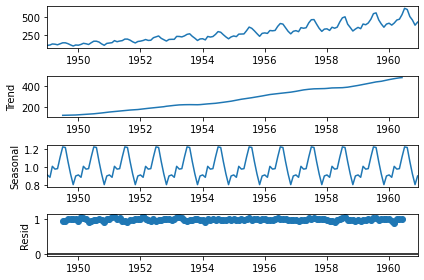

In [34]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
decomposicao_p.plot();

### AUTOCORRELACAO

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

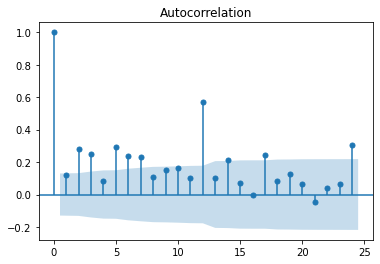

In [37]:
plot_acf(dados_set['Casos']);

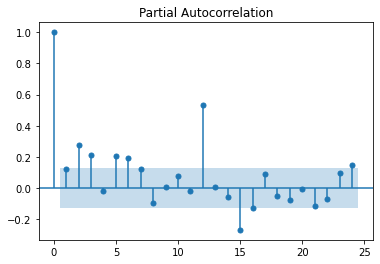

In [39]:
#autocorrelacao parcial

plot_pacf(dados_set['Casos']);

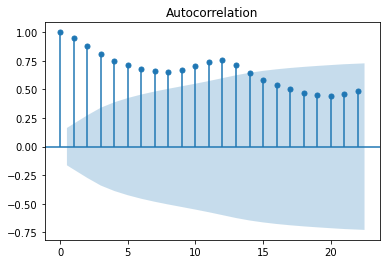

In [41]:
#autocorrelacao do dataset de passageiros
plot_acf(dados_passageiros['#Passengers']);

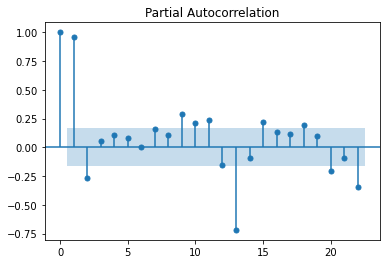

In [43]:
#autocorrelacao do dataset de passageiros parcial
plot_pacf(dados_passageiros['#Passengers']);